<a href="https://colab.research.google.com/github/daurice/capstone/blob/main/Doris_Mugah_Group_26_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
#importing Google drive
from google.colab import drive
drive.mount('/content/drive')


#Importing numpy,matplotlib,pandas, seaborn libraries.Sklearn,Scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn_pandas
from sklearn.preprocessing import RobustScaler,LabelEncoder,MinMaxScaler
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
#using pandas to read the churn dataframe
df = pd.read_csv('/content/drive/MyDrive/data science/Capstone project/Churn_Modelling_26.csv')

#print the churn dataframe
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [235]:
#analyzing the data types
df.dtypes



RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

Cleaning data


In [236]:
# Drop NaN values from specific columns
df = df.dropna(subset=['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn'])

# Impute NaN values in the specified columns with their mean
cols_to_impute = ['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']
df.loc[:, cols_to_impute] = df.loc[:, cols_to_impute].fillna(df.loc[:, cols_to_impute].mean())

# Convert specified columns to integer type
df.loc[:, cols_to_impute] = df.loc[:, cols_to_impute].astype(int)

# Check the data types after conversion
print(df.dtypes)



RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object


1a.Changing Object to category

In [237]:
# Select columns with dtype 'object'
obj_cols = df.select_dtypes(include=['object'])

# Change dtype to 'category'
df.loc[:, obj_cols.columns] = obj_cols.astype('category')

# Print data types after conversion
print(df.dtypes)



RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object


In [238]:
#checking for the changes on df
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,NaN,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,NaN,Yes,No,1.0


In [239]:
#checking for nan values and printing
nan_vals=df.isna().sum()
print('Nan values in churn:',nan_vals)

Nan values in churn: RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


1b.check for Nan values in data and then remove null values for
‘Tenure’ column using mean()

In [240]:

# mean_ten is the mean value for 'Tenure'
mean_ten = df['Tenure'].mean()

# Fill NaN values in 'Tenure' column with the mean value
df.loc[:, 'Tenure'].fillna(mean_ten, inplace=True)
# Print DataFrame after filling missing values
print(nan_vals)



RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


<ipython-input-240-8d4977cd73c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Tenure'].fillna(mean_ten, inplace=True)


Validating nan values have been removed

In [241]:
#Validating that the nan values have been removed
nan_vals=df.isna().sum()
print('Nan values in churn:',nan_vals)

Nan values in churn: RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


Dropping Unnamed.

In [242]:
# Find and drop columns starting with 'Unnamed'
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=unnamed_columns)

print(df.columns)




Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'Churn'],
      dtype='object')


2A.Checking for Dupicates

In [243]:
#checking for duplicates
dups = df[df.duplicated()]
#view duplicated rows
if  not dups.empty:
  print('duplicated rows:',dups)
else:
  print('no duplicates were found')

no duplicates were found


2B.Checking for outliers.

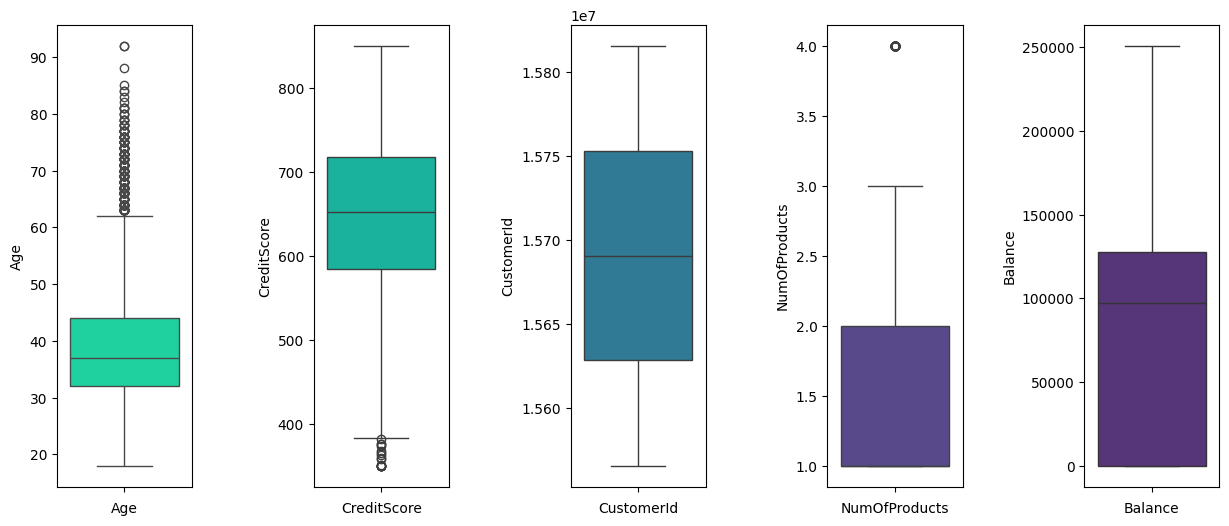

In [244]:
# Initialize figure with 5 subplots in a row
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.9)

# Draw boxplot for 'Age' in the 1st subplot
sns.boxplot(data=df['Age'], ax=ax[0], color='#01EFAC',width=0.8)
ax[0].set_xlabel('Age')

# Draw boxplot for 'CreditScore' in the 2nd subplot
sns.boxplot(data=df['CreditScore'], ax=ax[1], color='#01CBAE', width=0.8)
ax[1].set_xlabel('CreditScore')

# Draw boxplot for 'CustomerId' in the 3rd subplot
sns.boxplot(data=df['CustomerId'], ax=ax[2], color='#2082A6', width=0.8)
ax[2].set_xlabel('CustomerId')

# Draw boxplot for 'NumOfProducts' in the 4th subplot
sns.boxplot(data=df['NumOfProducts'], ax=ax[3],color='#524094', width=0.8)
ax[3].set_xlabel('NumOfProducts')

# Finally, draw boxplot for 'Balance' in the 5th subplot
sns.boxplot(data=df['Balance'], ax=ax[4], color='#562A83',width=0.8)
ax[4].set_xlabel('Balance')

# Remove x-tick labels in each subplot
#for subplot in ax:
    #subplot.set_xticklabels([])

plt.show()

2B Removing outliers.

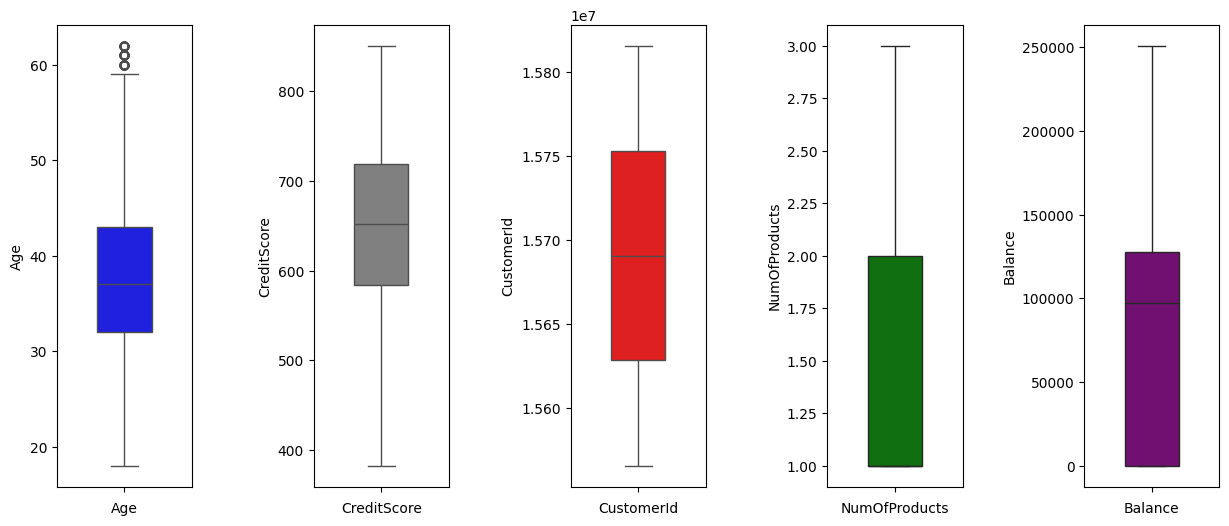

In [245]:
# Initialize figure with 5 subplots in a row
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.9)

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]



# Draw boxplot for 'Age' in the 1st subplot
sns.boxplot(data=remove_outliers_iqr(df['Age']), ax=ax[0], color='blue',width=0.4)
ax[0].set_xlabel('Age')

# Draw boxplot for 'CreditScore' in the 2nd subplot
sns.boxplot(data=remove_outliers_iqr(df['CreditScore']), ax=ax[1], color='grey', width=0.4)
ax[1].set_xlabel('CreditScore')

# Draw boxplot for 'CustomerId' in the 3rd subplot
sns.boxplot(data=remove_outliers_iqr(df['CustomerId']), ax=ax[2], color='red', width=0.4)
ax[2].set_xlabel('CustomerId')

# Draw boxplot for 'NumOfProducts' in the 4th subplot
sns.boxplot(data=remove_outliers_iqr(df['NumOfProducts']), ax=ax[3], color='green', width=0.4)
ax[3].set_xlabel('NumOfProducts')

# Finally, draw boxplot for 'Balance' in the 5th subplot
sns.boxplot(data=remove_outliers_iqr(df['Balance']), ax=ax[4], color='purple',width=0.4)
ax[4].set_xlabel('Balance')

# Remove x-tick labels in each subplot
for subplot in ax:
    subplot.set_xticklabels([])

plt.show()


2C.Countplot for Categorical features

Observations
             

*   7000 have no credit card while 3000 have credit card

*   Below 5000 are active members above 5000 are not active members
*   Most(5000) are from France ,others are from Spain and Germany
*   Above 5000 are male while the female are lesser






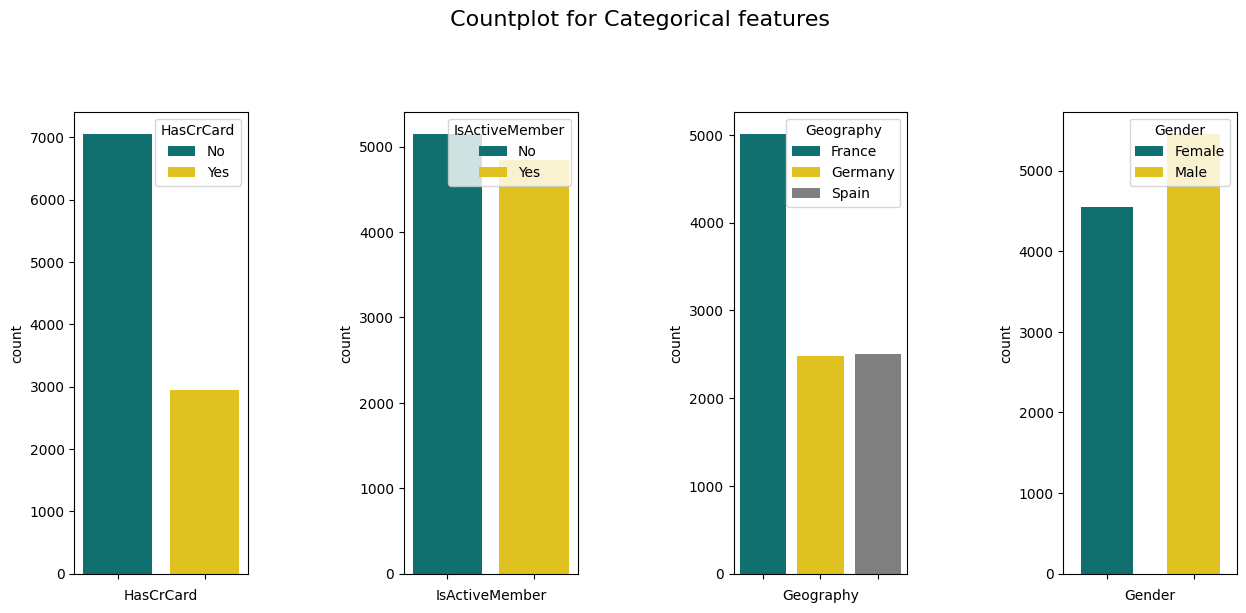

In [246]:

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

# Add padding between the subplots
fig.subplots_adjust(wspace=0.9)

# Super title to adjust the position of the main title
plt.suptitle(' Countplot for Categorical features', y=1.05, fontsize=16)

# Draw countplot for 'HasCrCard' in the 1st subplot
sns.countplot(data=df, x='HasCrCard', ax=ax[0], hue='HasCrCard', palette=['teal', 'gold'], width=0.8)
ax[0].set_xlabel('HasCrCard')
ax[0].legend(title='HasCrCard', labels=['No', 'Yes'])
ax[0].set_xticklabels([])

# Draw countplot for 'IsActiveMember' in the 2nd subplot
sns.countplot(data=df, x='IsActiveMember', ax=ax[1], hue='IsActiveMember', palette=['teal', 'gold'], width=0.8)
ax[1].set_xlabel('IsActiveMember')
ax[1].legend(title='IsActiveMember', labels=['No', 'Yes'])
ax[1].set_xticklabels([])

# Draw countplot for 'Geography' in the 3rd subplot
sns.countplot(data=df, x='Geography', ax=ax[2],hue='Geography', palette=['teal', 'gold','grey'], width=0.8)
ax[2].set_xlabel('Geography')
ax[2].legend(title='Geography', labels=['France', 'Germany','Spain'])
ax[2].set_xticklabels([])

# Countplot for 'Gender' divided by 'Female' and 'Male' in the 4th subplot
sns.countplot(data=df, x='Gender', ax=ax[3], hue='Gender', palette=['teal', 'gold'], width=0.6)
ax[3].set_xlabel('Gender')
ax[3].legend(title='Gender', labels=['Female', 'Male'])
ax[3].set_xticklabels([])


# Show the plot
plt.show()


2D.Histograms for numeric features

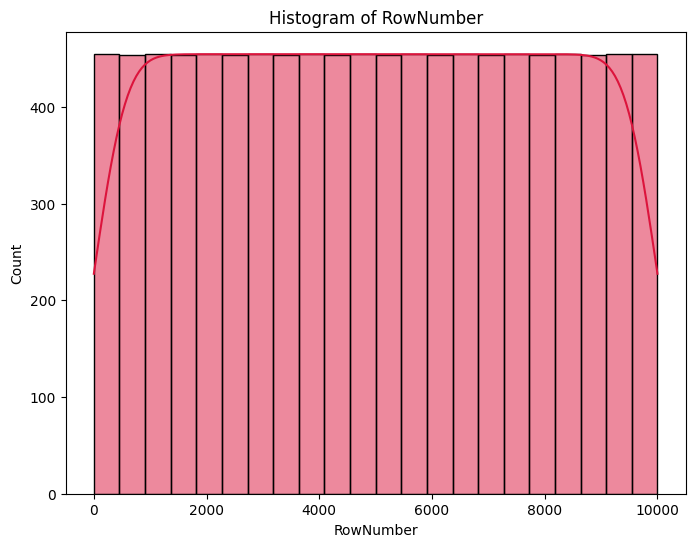

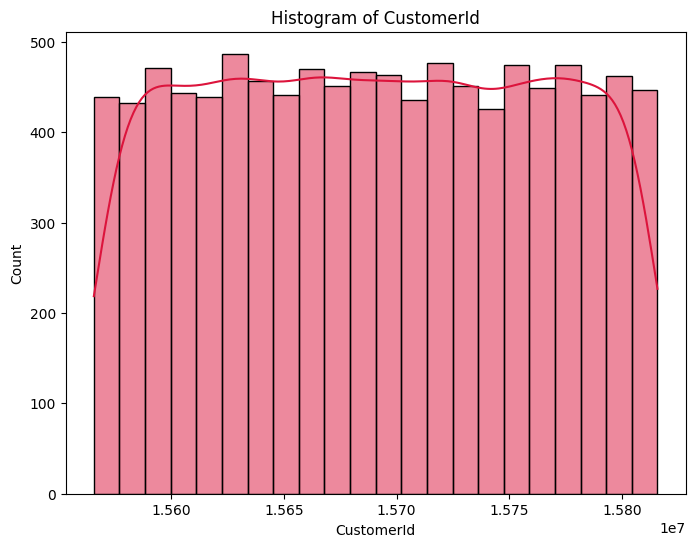

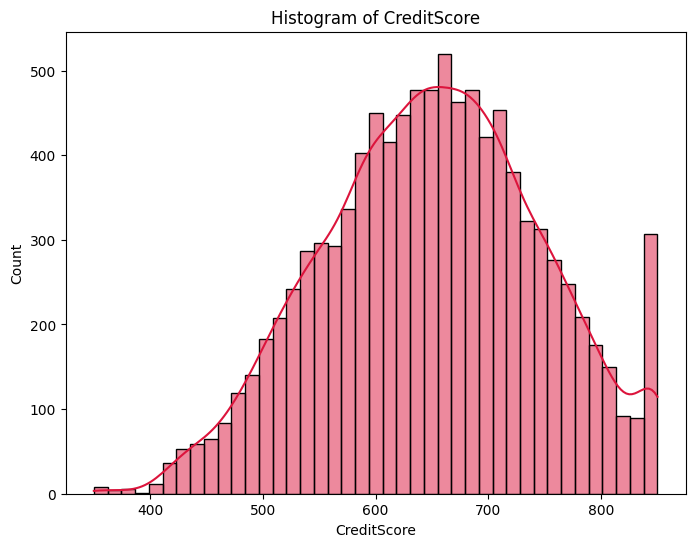

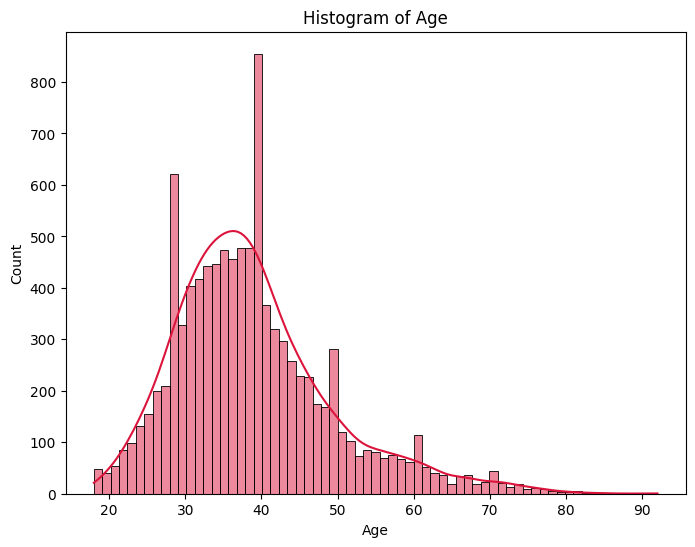

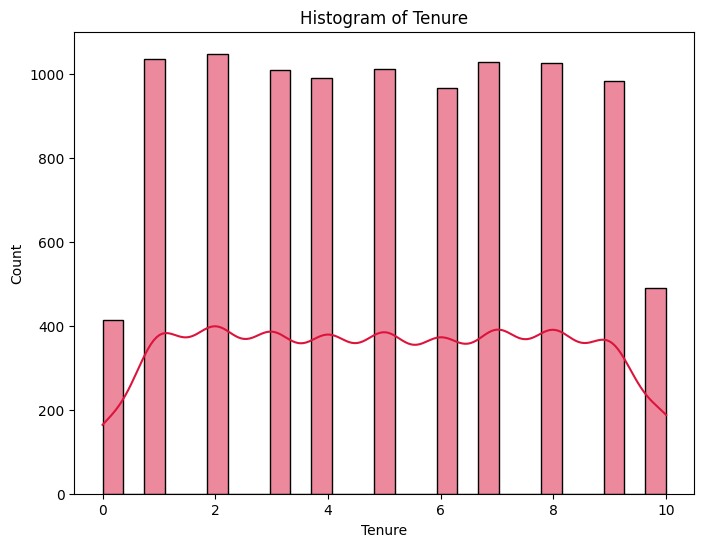

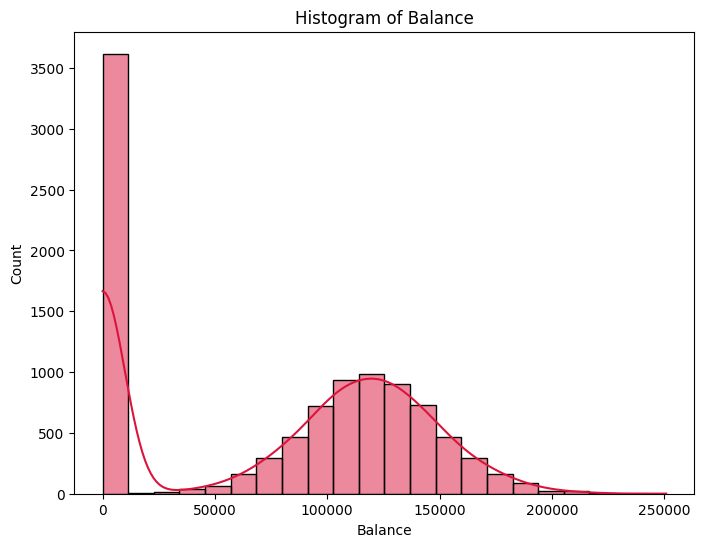

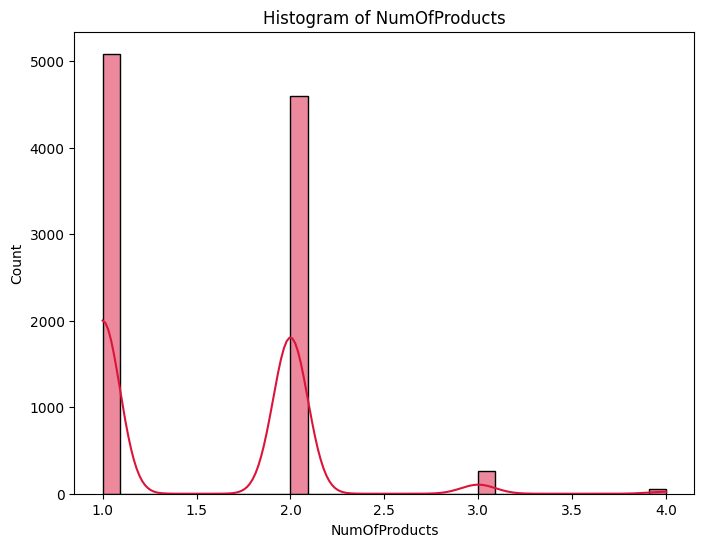

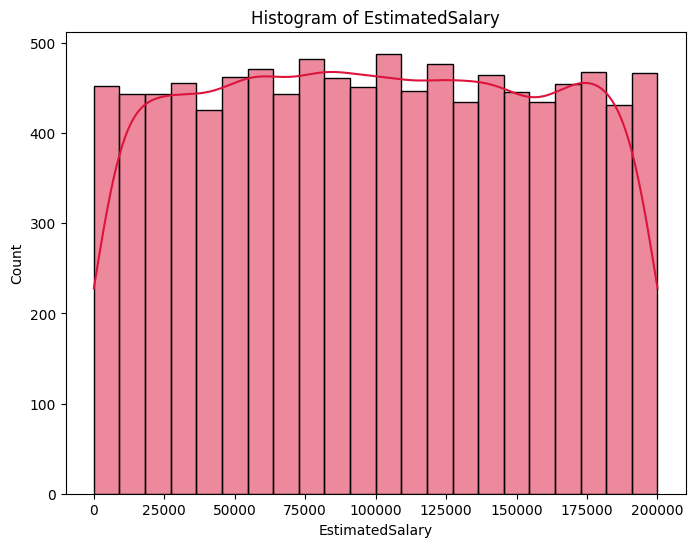

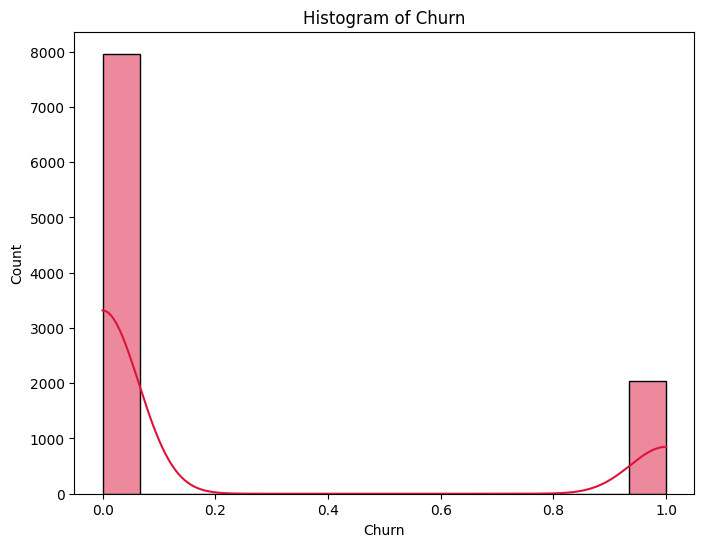

In [247]:
# Draw histograms for numeric features
numeric_features = df.select_dtypes(include=[np.float64, np.int64]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True, color='crimson')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Compute skewness of variables
skewness = df[numeric_features].apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]  # Filtering out variables with high skewness

# Apply transformation function if needed
skewed_features = skewness.index
for feature in skewed_features:
    df[feature] = boxcox1p(df[feature], 0.15)  # Applying box-cox transformation

# Recalculate skewness after transformation
skewness_after_transform = df[skewed_features].apply(lambda x: skew(x.dropna()))

3A.Jointplot using hue parameter

Age vs NumOfProducts

 There might be a slight tendency for younger individuals to have fewer products, but this trend is not very pronounced. There are some outliers where individuals of various ages have a higher number of products, indicating potential special cases or specific customer segment

 CreditScore vs Balnce: There appears to be a weak positive correlation between credit score and balance. As the credit score increases, the balance tends to increase as well, although the relationship is not very strong. There are some clusters of points where individuals with lower credit scores have both low and high balances, suggesting that credit score alone may not be the only determinant of balance. The scatterplot shows a wide range of balances across different credit scores, indicating that other factors may also influence the balance maintained by individuals.



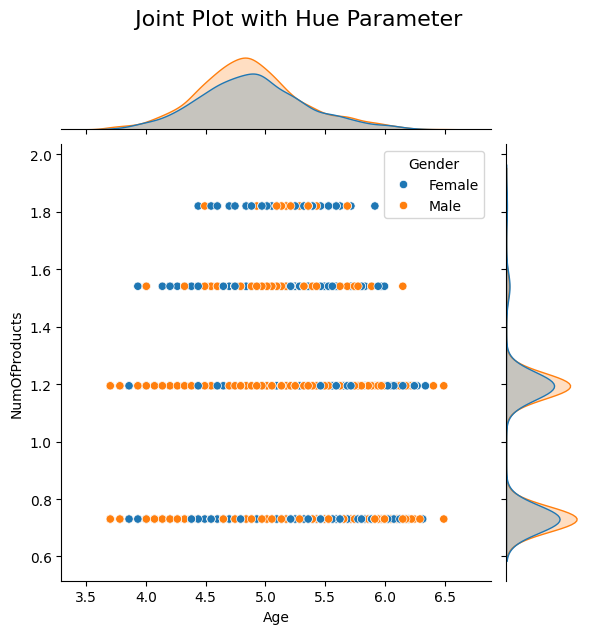

In [ ]:
#jointplot using hue parameter
sns.jointplot(x='Age', y='NumOfProducts', data=df, hue='Gender', kind='scatter')
# Super title to adjust the position of the main title
plt.suptitle(' Joint Plot with Hue Parameter', y=1.05, fontsize=16)
plt.show()
sns.jointplot(x='CreditScore', y='Balance', data=df, hue='Gender', kind='scatter')
plt.show()
df.dtypes




3B.Scatter plot with hue parameter for same two pairs of
variables.
A scatter plot displays the distribution of data points for two variables on a two-dimensional plane, while a joint plot combines a scatter plot with marginal distributions to provide a more comprehensive visualization of the relationship between the variables.

In [ ]:
#Scatterplot using two pairs of variables
sns.scatterplot(x='Age', y='NumOfProducts', data=df, hue='Gender')
plt.title("Scatter Plot with Hue Parameter")
plt.show()
sns.scatterplot(x='CreditScore', y='Balance', data=df, hue='Gender')
plt.show()

3c.Scaling method to for all numeric features.

In [ ]:
# Select numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Apply RobustScaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns, index=numeric_features.index)

# Replace original numeric features with scaled ones
df[numeric_features.columns] = scaled_df

# Now data contains scaled numeric features
print(df.head())


3D.Non-numeric features to either delete a column or convert them into numeric ones using appropriate encoding techniques

In [ ]:

# Separate non-numeric features
non_numeric_features = df.select_dtypes(exclude=['float64', 'int64'])



# Convert non-numeric features to numeric ones using appropriate encoding techniques
for column in non_numeric_features.columns:
    if non_numeric_features[column].nunique() > 10:
        # If the number of unique categories is large, it's better to delete the column
        df.drop(column, axis=1, inplace=True)
    else:
        # Otherwise, use label encoding
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])

# Now df contains numeric features
print(df.head())

4.Heatmap correlation of each independent feature with dependent variable ‘Churn’

In [ ]:
# Define DataFrames for section 3(b) and section 3(c)
df_b = pd.DataFrame(df[['Age', 'Balance','NumOfProducts','Gender','CreditScore']])
df_c = scaled_df

# Combine the datasets
combined_df = pd.concat([df_b, df_c], axis=1)

# Compute correlation matrix among all independent features
correlation_matrix = combined_df.corr()

# Demonstrate correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Independent Features")
plt.show()

# Compute correlation of each independent feature with the dependent variable 'Churn'
correlation_with_churn = combined_df.corr()['Churn'].drop('Churn')  # Drop Churn column itself
print("Correlation of each independent feature with 'Churn':")
print(correlation_with_churn)

print(correlation_matrix)
# Select 5 most important independent features from the set
top_5_features = correlation_with_churn.abs().nlargest(5).index
print("\nTop 5 most important independent features:")
print(top_5_features)

5.Feature selection method to the dataset using SelectKBest()

In [ ]:
# Split the dataset into training and testing sets (80% for training)
Ctrain, Ctest, Dtrain, Dtest_test = train_test_split(df.drop("Churn", axis=1), df["Churn"], test_size=0.2, random_state=42)

# Apply feature scaling
scaler = MinMaxScaler()
C_train_scaled = scaler.fit_transform(Ctrain)
C_test_scaled = scaler.transform(Ctest)
#Identify the unique value in y_train
unique_values = Dtrain.unique()
#mapping unique value to distinct label
label_mapping = {value: i for i, value in enumerate(unique_values)}
#apply mapping to y_train to convert it to categorical labels
Dtrain = Dtrain.map(label_mapping)

#Apply feature selection using SelectKBest with k=5
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(C_train_scaled, Dtrain)

#Transform the dataset to keep only the selected features
C_train_selected = selector.transform(C_train_scaled)
C_test_selected = selector.transform(C_test_scaled)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = Ctrain.columns[selected_indices]
#Printing the 5 selected fetures

print("Selected features:",selected_indices ,selected_features )
